**NAME:LUCKY, EMAILID:luckysinghal97@gmail.com**


# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [6]:
#Import warnings

import warnings

In [7]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install numpy==1.26.4


In [8]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df= pd.read_parquet('/content/drive/MyDrive/trip_records/2023-1.parquet')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/trip_records/2023-1.parquet'

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
sampled_data=pd.DataFrame()
df['date']=df['tpep_pickup_datetime'].dt.date
df['hour']=df['tpep_pickup_datetime'].dt.hour
for x in df['date'].unique():
  date_data=df[df['date']==x]
  for y in date_data['hour'].unique():
    hour_data=date_data[date_data['hour']==y]
    sample = hour_data.sample(frac = 0.05, random_state = 42)
    sampled_data= pd.concat([sampled_data, sample])
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        g=pd.read_parquet(file_path)
        g=g[g['tpep_pickup_datetime'].dt.year==2023]



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        g['date']=g['tpep_pickup_datetime'].dt.date
        g['hour']=g['tpep_pickup_datetime'].dt.hour
        for x in g['date'].unique():
           g1=g[g['date']==x]
           for y in g1['hour'].unique():
            hour_data=g1[g1['hour']==y]
            sample = hour_data.sample(frac = 0.05, random_state = 42)
            sampled_data= pd.concat([sampled_data, sample])

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df =pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
#df=df.sample(275000,random_state=42)

df.to_parquet('/content/drive/MyDrive/combined data1')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file

df=pd.read_parquet('/content/drive/MyDrive/combined data1')


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.drop(['date','hour'],inplace=True,axis=1)
df.sort_values(by=['tpep_pickup_datetime'],inplace=True)
df.reset_index(drop=True,inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns

df['Airport_fee']=df[['Airport_fee','airport_fee']].sum(axis=1)
df.drop(['airport_fee'],inplace=True,axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
print('fare amount with negative entries:',df[df['fare_amount']<0]['RatecodeID'].value_counts())
print('total amount with negative entries:',df[df['total_amount']<0]['RatecodeID'].value_counts())#mostly are 1 and 2 nos which means standard rate or jfk type of trips
#check if payment type is cash mostly then it might me system glitch in this case we can take abs of negative columns

fare amount with negative entries: Series([], Name: count, dtype: int64)
total amount with negative entries: RatecodeID
1.0    49
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Find which columns have negative values
numeric_cols=df.select_dtypes("number").columns.tolist()
negative_value_columns=list(df[df[numeric_cols]<0].count()[df[df[numeric_cols]<0].count()!=0].index)

print('negative number columns are:',negative_value_columns)
# Analyse RatecodeID for the negative fare amounts
#no negative fare amount found
#mostly total amounts are 1 and 2 nos which means standard rate or jfk type of trips
#check if payment type is cash, mostly then it might me system glitch in this case we can take abs of negative columns

negative number columns are: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [16]:
# fix these negative values
df[['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']]=abs(df[['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']])



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column

df.isna().sum()/len(df)*100



VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420905
trip_distance            0.000000
RatecodeID               3.420905
store_and_fwd_flag       3.420905
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420905
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].replace(0, np.nan)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [19]:
# Fix missing values in 'RatecodeID'
df.loc[df['RatecodeID']==99,'RatecodeID']=np.nan

#df.dropna(subset=['RatecodeID'],inplace=True)
df['RatecodeID'].median()
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [20]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [21]:
# Handle any remaining missing values
df.isna().sum()
df['store_and_fwd_flag'].value_counts()
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [22]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()




VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896399e+06                     1896399                     1896399   
mean   1.733026e+00  2023-07-02 20:00:01.260954  2023-07-02 20:17:27.250126   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00  2023-04-02 16:10:10.500000         2023-04-02 16:27:45   
50%    2.000000e+00         2023-06-27 15:44:33         2023-06-27 16:01:17   
75%    2.000000e+00         2023-10-06 19:37:48         2023-10-06 19:53:42   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476402e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896399e+06   1.896399e+06  1.896399e+06  1.896399e+06   
mean      1.372236e+00   3.858294e+00  1.071821e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  6.000000e+00  2.650000e+02   
std       8.644040e-01   1.294086e+02  3.872344e-01  6.400039e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06   
mean   1.640515e+02  1.163817e+00  1.991936e+01  1.588023e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980208e+01  5.081385e-01  1.055371e+02  1.829197e+00  4.845943e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896399e+06  1.896399e+06           1.896399e+06  1.896399e+06   
mean   3.547011e+00  5.965341e-01           9.990529e-01  2.898217e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054883e+00  2.187878e+00           2.835736e-02  1.064162e+02   

       congestion_surcharge   Airport_fee  
count          1.896399e+06  1.896399e+06  
mean           2.314256e+00  1.380349e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.556360e-01  4.575820e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [23]:
# remove passenger_count > 6
df=df[df['passenger_count']<=6]

<Axes: ylabel='trip_distance'>

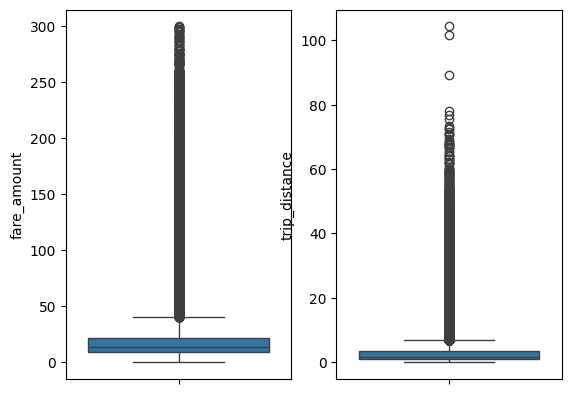

In [70]:
# Drop outliers based on fare and trip distance
df = df.drop(df[(df['fare_amount'] > 300) & (df['trip_distance'] < 0.1)].index)

# Drop trips with 0 fare and distance but different pickup and dropoff zones
df = df.drop(df[(df['fare_amount'] == 0) &
                (df['trip_distance'] == 0) &
                (df['DOLocationID'] != df['PULocationID'])].index)

# Drop unrealistic trip distances
df = df.drop(df[df['trip_distance'] > 250].index)

# Fix 0 payment_type: Replace with mode (most frequent value)
most_common_payment = df['payment_type'].mode()[0]
df.loc[df['payment_type'] == 0, 'payment_type'] = most_common_payment
plt.subplot(1,2,1)
sns.boxplot(df['fare_amount'])
plt.subplot(1,2,2)
sns.boxplot(df['trip_distance'])

In [25]:
df=df[df['trip_distance']<120]
df=df[df['fare_amount']<300]

In [26]:
# Do any columns need standardising?
' no any column does not need standarization '

' no any column does not need standarization '

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [27]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [28]:
print('Categorical Variables:VendorID, RatecodeID, PULocationID, DOLocationID, payment_type, pickup_hour')

print('Numerical Variables:passenger_count, trip_distance, trip_duration')

print('Datetime Variables:tpep_pickup_datetime, tpep_dropoff_datetime')

print('Monetary Variables (Numerical):fare_amount, extra, mta_tax, tip_amount, tolls_amount,improvement_surcharge, total_amount, congestion_surcharge, airport_fee')

Categorical Variables:VendorID, RatecodeID, PULocationID, DOLocationID, payment_type, pickup_hour
Numerical Variables:passenger_count, trip_distance, trip_duration
Datetime Variables:tpep_pickup_datetime, tpep_dropoff_datetime
Monetary Variables (Numerical):fare_amount, extra, mta_tax, tip_amount, tolls_amount,improvement_surcharge, total_amount, congestion_surcharge, airport_fee


**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-29-6822ef2d1045>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'hour']=df['tpep_pickup_datetime'].dt.hour


top3 highest pickup time by hours= [18, 17, 19]


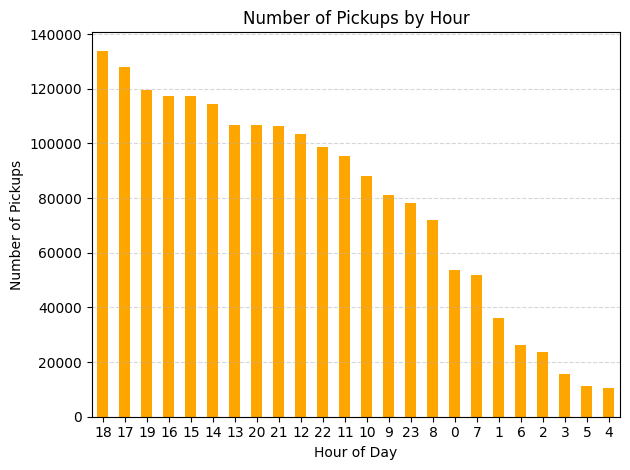

In [29]:
# Find and show the hourly trends in taxi pickups

df.loc[:,'hour']=df['tpep_pickup_datetime'].dt.hour
plt.figure()
df.groupby('hour')['tpep_pickup_datetime'].count().sort_values(ascending=False).plot.bar(color='orange')
print('top3 highest pickup time by hours=',list(df.groupby('hour')['tpep_pickup_datetime'].count().sort_values(ascending=False).head(3).index))
plt.title('Number of Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/images')
plt.show()

top day and bottom day for taxi pick up are:['Thu'] and ['Mon']


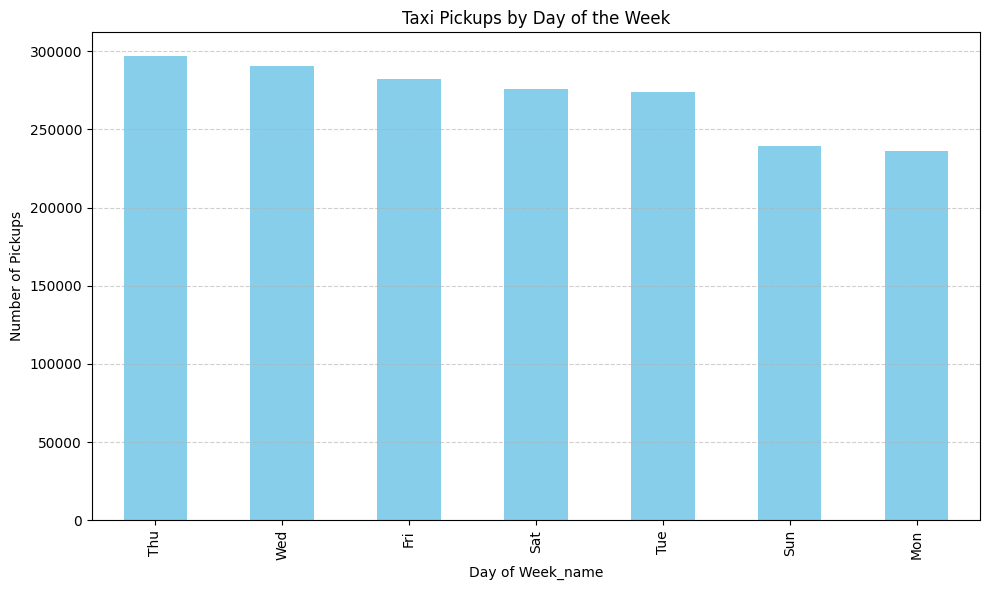

In [30]:
# Find and show the daily trends in taxi pickups (days of the week)

df.loc[:,'day_of_week']=df['tpep_pickup_datetime'].dt.weekday
df.loc[:,'day_of_week_name']=df['day_of_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

df.loc[:,'day']=df['tpep_pickup_datetime'].dt.day
plt.figure(figsize=(10,6))
y=df.groupby('day_of_week_name')['tpep_pickup_datetime'].count().sort_values(ascending=False)
df.groupby('day_of_week_name')['tpep_pickup_datetime'].count().sort_values(ascending=False).plot.bar(color='skyblue')
print(f'top day and bottom day for taxi pick up are:{list(y.head(1).index)} and {list(y.tail(1).index)}')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of Week_name')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('/content/drive/MyDrive/images1')
plt.tight_layout()

plt.show()


top month and bottom month for taxi pick up are:['Oct'] and ['Aug']


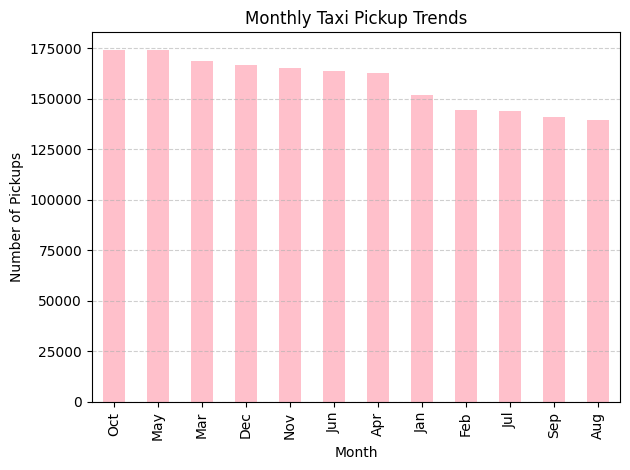

In [31]:
# Show the monthly trends in pickups

df.loc[:,'month']=df['tpep_pickup_datetime'].dt.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
y=df.groupby('month')['tpep_pickup_datetime'].count().sort_values(ascending=False)
df.groupby('month')['tpep_pickup_datetime'].count().sort_values(ascending=False).plot.bar(color='pink')
print(f'top month and bottom month for taxi pick up are:{list(y.head(1).index)} and {list(y.tail(1).index)}')
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [32]:
# Analyse the above parameters
print('zero value in fare count:',len(df[df['fare_amount']==0]))
print('zero value in tip amount:',len(df[df['tip_amount']==0]))
print('zero value in total amount:',len(df[df['total_amount']==0]))
print('zero value in trip distance:',len(df[df['trip_distance']==0]))


zero value in fare count: 587
zero value in tip amount: 435755
zero value in total amount: 264
zero value in trip distance: 37608


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [33]:
# Create a df with non zero entries for the selected parameters.

df1 = df.loc[(df['fare_amount'] != 0) &(df['tip_amount'] != 0) &(df['total_amount'] != 0) &(df['trip_distance'] != 0)].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

maximum and minimum revenue by month on= ['Oct'] and ['Aug']


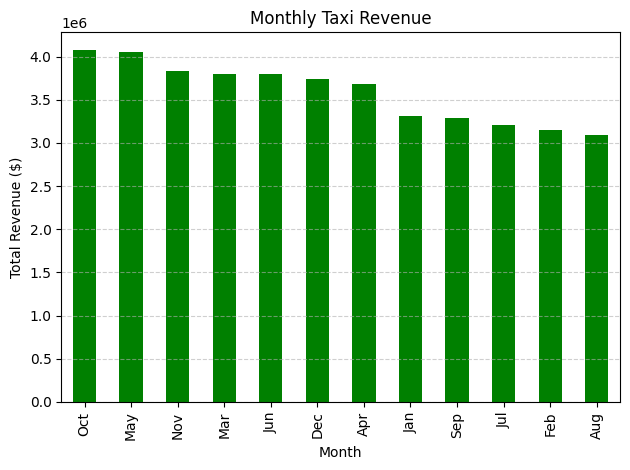

In [34]:
# Group data by month and analyse monthly revenue
y=df1.groupby('month')['total_amount'].sum().sort_values(ascending=False)
df1.groupby('month')['total_amount'].sum().sort_values(ascending=False).plot.bar(color='green')
#max 10th month min 8th month
print(f'maximum and minimum revenue by month on= {list(y.head(1).index)} and {list(y.tail(1).index)}')
plt.title('Monthly Taxi Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/images4')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter_group
Q1    23.843315
Q2    26.800690
Q3    22.285290
Q4    27.070705
Name: total_amount, dtype: float64


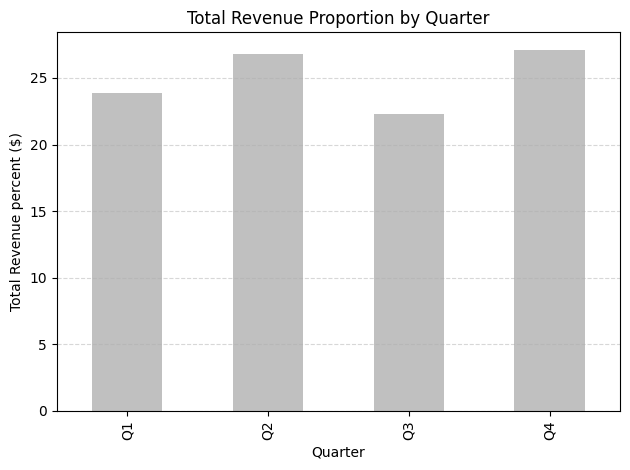

In [35]:
# Calculate proportion of each quarter
month_to_quarter = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'}
df1['quarter_group'] = df1['month'].map(month_to_quarter)
plt.figure()

(df1.groupby(['quarter_group'])['total_amount'].sum()/df1['total_amount'].sum()*100).plot.bar(color='silver')
plt.title('Total Revenue Proportion by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue percent ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/images5')

print(df1.groupby(['quarter_group'])['total_amount'].sum()/df1['total_amount'].sum()*100)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

0.9503872146525815
there is strong correlation for trip distance and fare amount


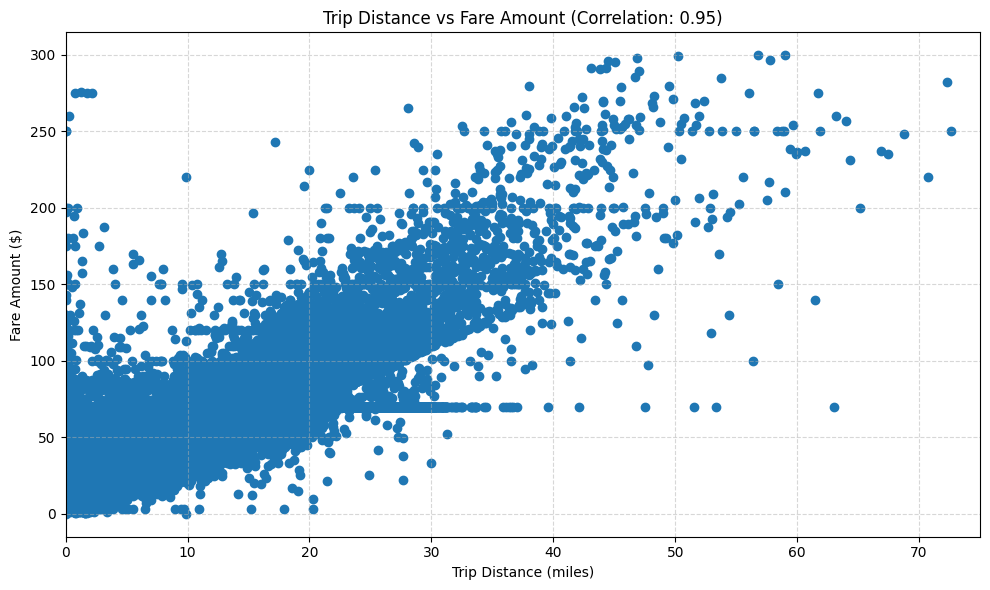

In [36]:
# Show how trip fare is affected by distance

df2=df1[df1['trip_distance']!=0]
plt.figure(figsize=(10, 6))


correlation = df2['trip_distance'].corr(df2['fare_amount'])
plt.xlim(0, 75)
plt.scatter(x=df2['trip_distance'],y=df2['fare_amount'])
plt.title(f'Trip Distance vs Fare Amount (Correlation: {correlation:.2f})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/316')

print(correlation)#good correlation
print('there is strong correlation for trip distance and fare amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

0.3334081216086562


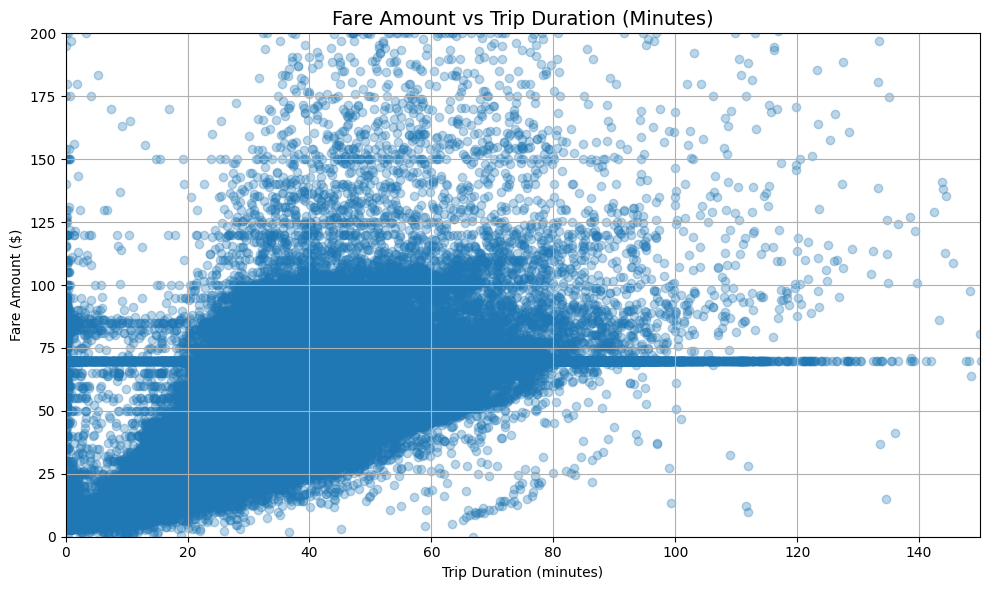

In [37]:
# Show relationship between fare and trip duration

df2.loc[:,'trip_duration_minute']=((df2['tpep_dropoff_datetime']-df2['tpep_pickup_datetime']).dt.total_seconds()/60).round(2)
df2=df2[(df2['trip_duration_minute']>0)]
plt.figure(figsize=(10, 6))
plt.scatter(df2['trip_duration_minute'], df2['fare_amount'], alpha=0.3)
plt.xlim(0, 150)
plt.ylim(0,200)
# Labels and title
plt.title('Fare Amount vs Trip Duration (Minutes)', fontsize=14)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/317')
correlation = df2['fare_amount'].corr(df2['trip_duration_minute'])
print(correlation)# no relation less correlated  as trip duration may be high due to traffic
plt.show()

0.03620554811479064


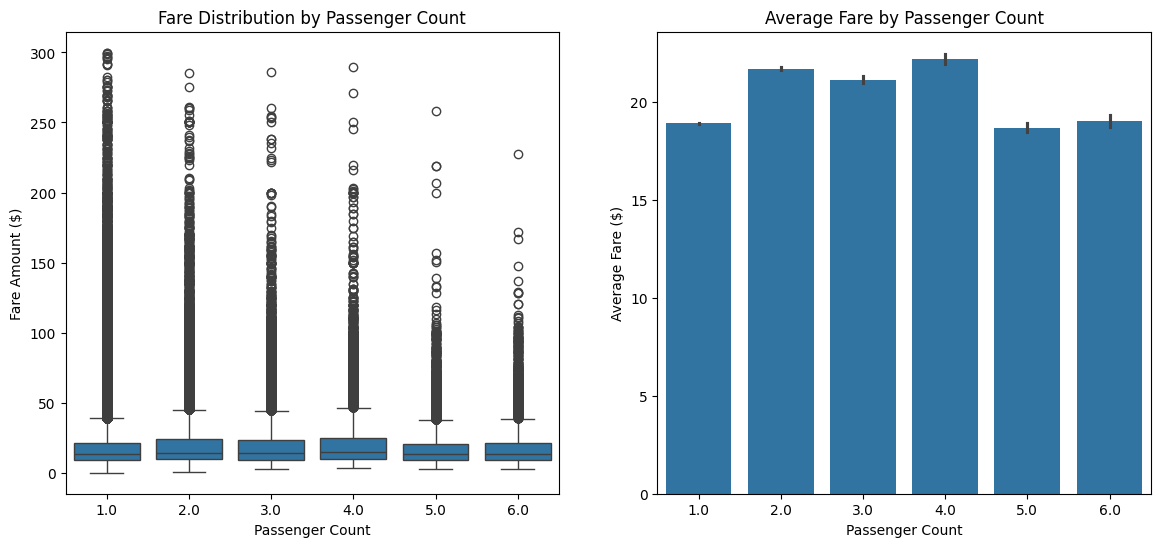

In [38]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(df2,x='passenger_count',y='fare_amount')
plt.title('Fare Distribution by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.savefig('/content/drive/MyDrive/3171')
plt.subplot(1,2,2)
sns.barplot(df2,x='passenger_count',y='fare_amount',estimator='mean')
plt.title('Average Fare by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
correlation = df2['passenger_count'].corr(df2['fare_amount'])
plt.savefig('/content/drive/MyDrive/3172')
print(correlation)# no relation less correlated very less correlation
plt.show()


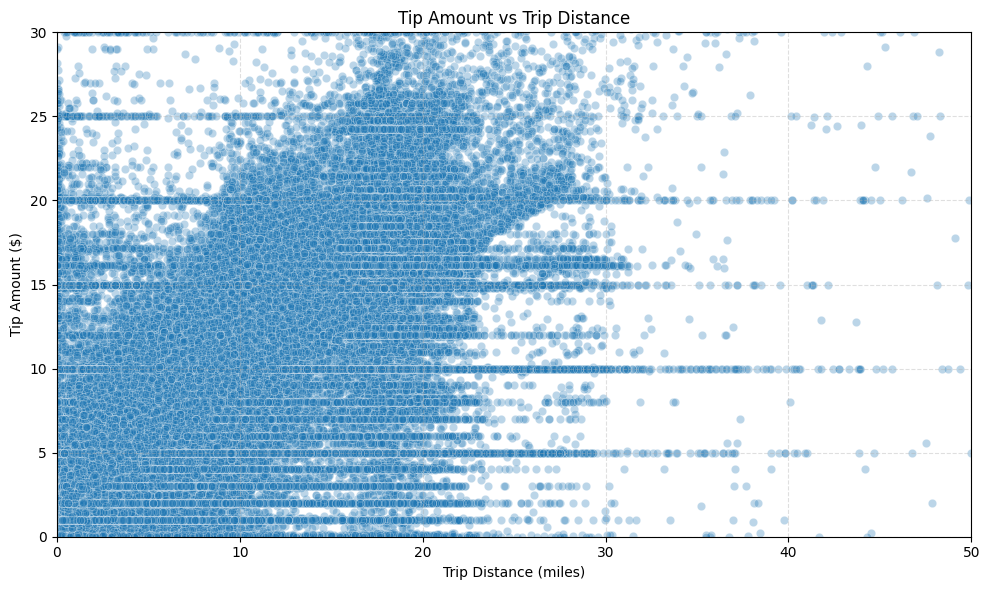

Correlation between trip distance and tip amount: 0.80


In [39]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='trip_distance', y='tip_amount', alpha=0.3)

plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.xlim(0, 50)
plt.ylim(0, 30)
plt.ylabel('Tip Amount ($)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3173')
plt.show()
correlation = df2['trip_distance'].corr(df2['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")
# 0.79 correlation factor which is good relation between these two

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

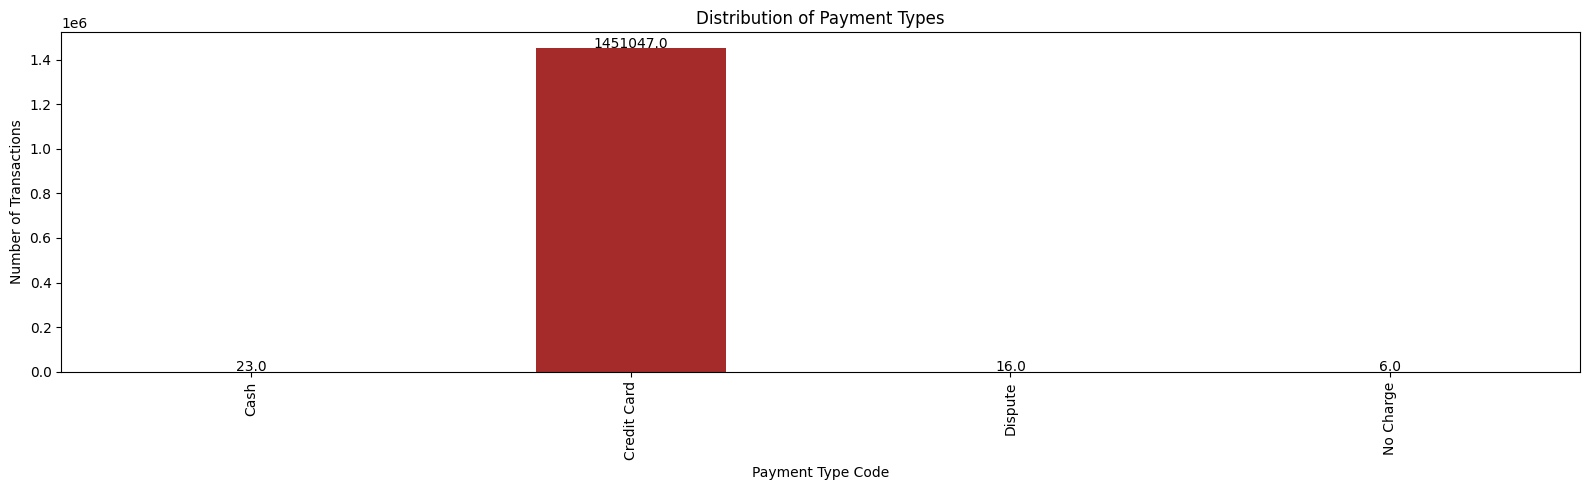

In [40]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(16, 5))
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'}
df2.loc[:,'payment_type_label'] = df2['payment_type'].map(payment_labels)
df2.groupby('payment_type_label')['payment_type_label'].count().plot.bar(color='brown')

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type Code')
plt.ylabel('Number of Transactions')
for i, val in enumerate(df2.groupby('payment_type_label')['payment_type_label'].count().values):
    plt.text(i, val + 500, f'{val:.1f}', ha='center')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/318')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [41]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [42]:
import geopandas as gpd


# Read the shapefile using geopandas
zones=gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
print(zones.head())
plt.savefig('/content/drive/MyDrive/319')

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


<Figure size 640x480 with 0 Axes>

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

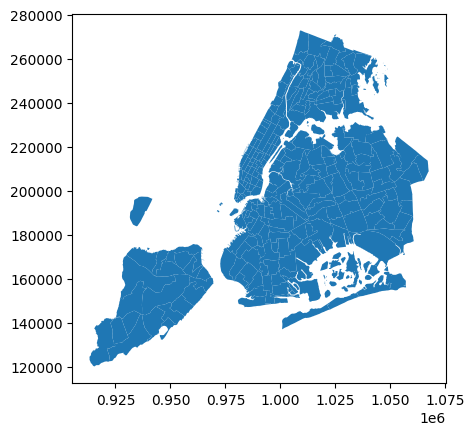

In [43]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [44]:
# Merge zones and trip records using locationID and PULocationID

df2#203176
merged=pd.merge(df2,zones,left_on='PULocationID',right_on='LocationID',how='inner')



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [45]:
# Group data by location and calculate the number of trips

no_of_trips=merged.groupby('LocationID')['LocationID'].count().reset_index(name='num_trips')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [46]:
# Merge trip counts back to the zones GeoDataFrame


zones=pd.merge(zones,no_of_trips,on='LocationID',how='left')
zones.fillna(0,inplace=True)
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     num_trips  
0         37.0  
1          2.0  
2          0.0  
3       1694.0  
4          0.0  
..         ...  
258        1.0  
259      111.0  
260     7095.0  
261    20527.0  
262    28821.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

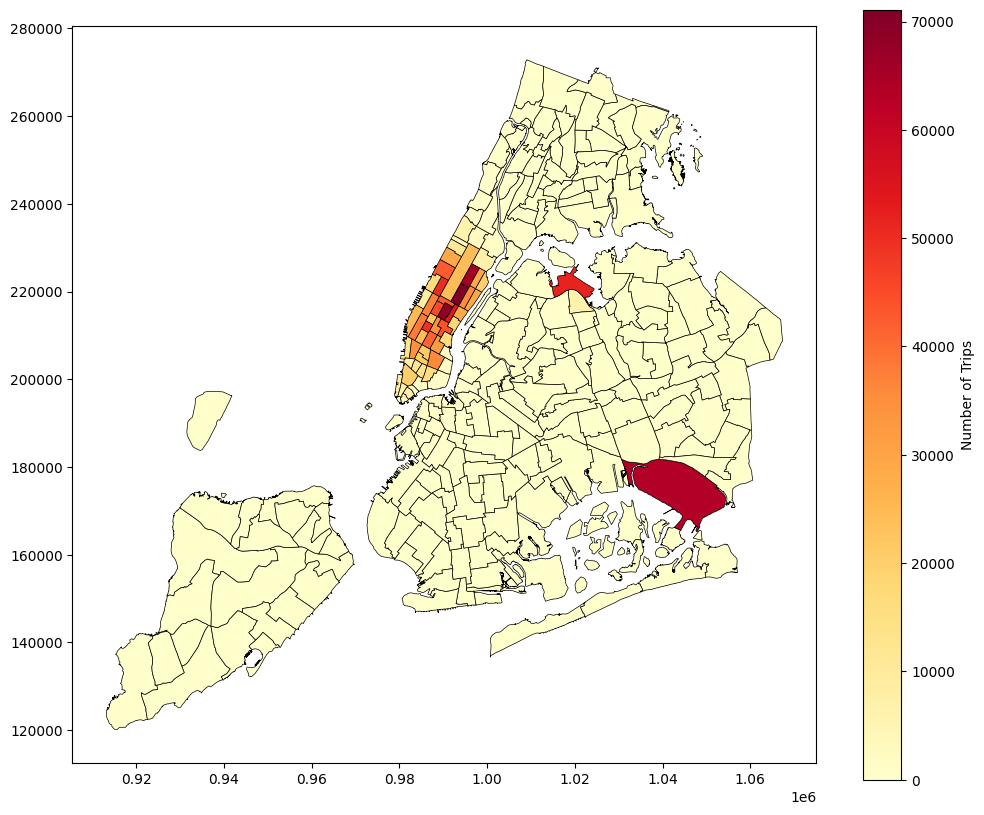

In [47]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(column='num_trips',ax = ax,legend = True,legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"},cmap='YlOrRd',edgecolor='black',linewidth=0.5)
plt.savefig('/content/drive/MyDrive/3113')

# Plot the map and display it



In [48]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='num_trips', ascending=False)
zones_sorted[['zone','num_trips']].head(5)

zone  num_trips
236  Upper East Side South    71098.0
160         Midtown Center    68711.0
235  Upper East Side North    65276.0
131            JFK Airport    63785.0
161           Midtown East    53424.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [49]:
# Find routes which have the slowest speeds at different times of the day
zone_map = zones.set_index('LocationID')['zone'].to_dict()
merged['pickup_zone'] = merged['PULocationID'].map(zone_map)
merged['dropoff_zone'] = merged['DOLocationID'].map(zone_map)
merged['route']=merged['pickup_zone']+'-'+merged['dropoff_zone']
merged_filtered=merged[merged['pickup_zone']!=merged['dropoff_zone']]#to avoid cancelled trip having very less trip distance which might have be cancelled
grouped = merged_filtered.groupby(['route', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_minute': 'mean',
    'pickup_zone': 'count'  # for optional filtering by volume
}).reset_index().rename(columns={'pickup_zone': 'trip_count'})
grouped['speed_mpm'] = grouped['trip_distance'] / grouped['trip_duration_minute']
grouped['speed_mph'] = grouped['speed_mpm'] * 60
grouped.sort_values('speed_mph',ascending=True)['route'].head(5)

5978                             Central Park-Baisley Park
2146                             Battery Park City-Seaport
55729                        Manhattan Valley-Bloomingdale
15968                      East Elmhurst-LaGuardia Airport
76326    Stuy Town/Peter Cooper Village-Greenwich Villa...
Name: route, dtype: object

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

busiest hour of day having hightest no of trip: 18 PM
no of trip for that hour is: 104852


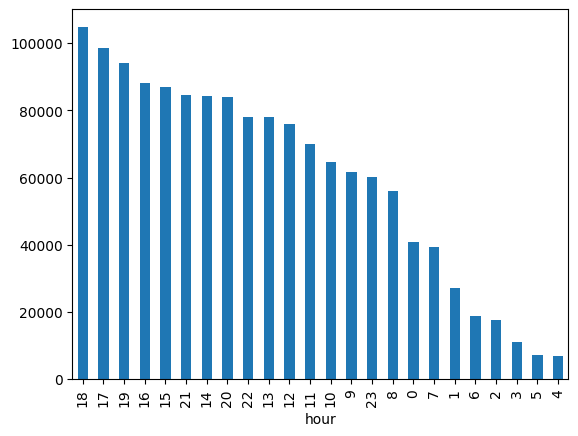

In [50]:
# Visualise the number of trips per hour and find the busiest hour
a=merged.groupby('hour')['LocationID'].count().sort_values(ascending=False)
a.plot.bar()
plt.savefig('/content/drive/MyDrive/322')
print(f'busiest hour of day having hightest no of trip: {a.index[0]} PM')
print('no of trip for that hour is:',a.max())


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [51]:
# Scale up the number of trips
a=merged.groupby('hour')['LocationID'].count().sort_values(ascending=False)/0.05
print('actual no of trips in five busiest hours:',a.head(5))
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05



actual no of trips in five busiest hours: hour
18    2097040.0
17    1971320.0
19    1879900.0
16    1761140.0
15    1738040.0
Name: LocationID, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

highest traffic in weekdays [18, 17, 19]
highest traffic in weekends [17, 18, 16]
lowest traffic in weekdays [2, 3, 4]
lowest traffic in weekends [4, 6, 5]
in weekday highest tarffic is in 5pm to 7pm around
in weekends highest tarffic is in 4pm to 6pm around


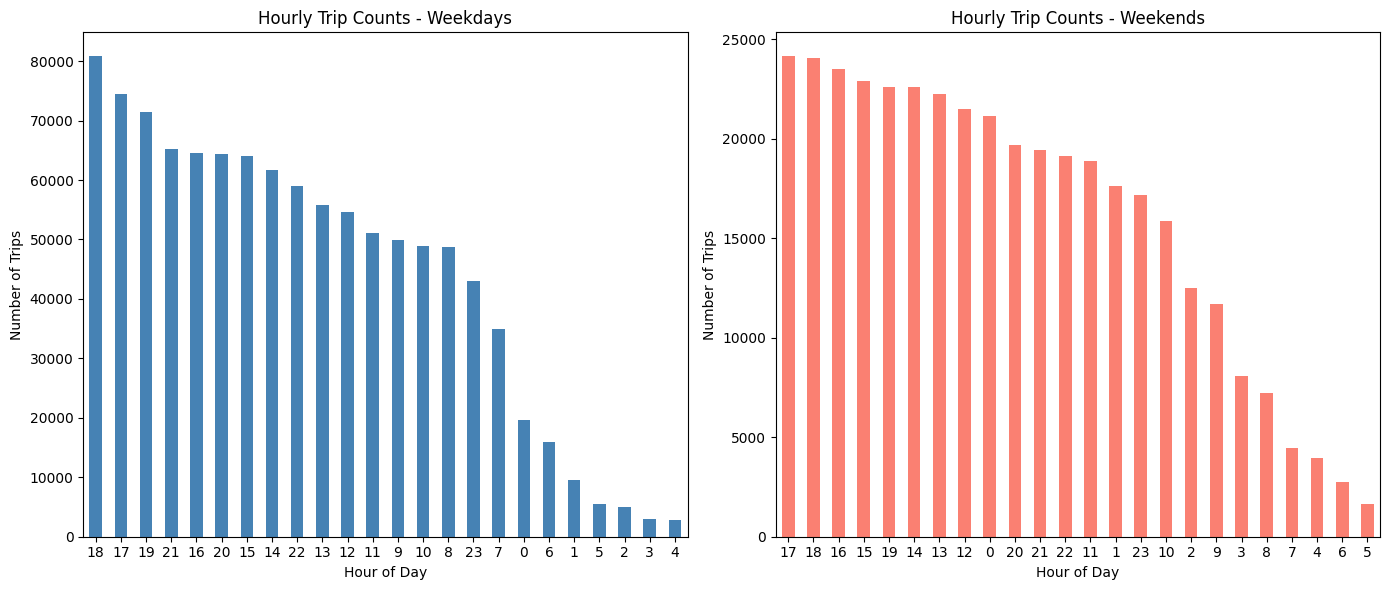

In [52]:
# Compare traffic trends for the week days and weekends


week_day_df = merged[merged['day_of_week'].isin([0,1, 2, 3, 4])]
week_end_df = merged[merged['day_of_week'].isin([6, 5])]

plt.figure(figsize=(14, 6))

# Weekday plot
plt.subplot(1, 2, 1)
week_day_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).plot.bar(color='steelblue')
plt.title('Hourly Trip Counts - Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.savefig('/content/drive/MyDrive/3241')

# Weekend plot
plt.subplot(1, 2, 2)
week_end_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).plot.bar(color='salmon')
plt.title('Hourly Trip Counts - Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
print('highest traffic in weekdays',list(week_day_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).head(3).index))
print('highest traffic in weekends',list(week_end_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).head(3).index))
print('lowest traffic in weekdays',list(week_day_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).tail(3).index))
print('lowest traffic in weekends',list(week_end_df.groupby('hour')['LocationID'].count().sort_values(ascending=False).tail(3).index))
print('in weekday highest tarffic is in 5pm to 7pm around')
print('in weekends highest tarffic is in 4pm to 6pm around')
plt.savefig('/content/drive/MyDrive/3242')
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

top 10 zones with high hourly pick up : ['Upper East Side South', 'Midtown Center', 'Upper East Side North', 'JFK Airport', 'Midtown East', 'LaGuardia Airport', 'Lincoln Square East', 'Penn Station/Madison Sq West', 'Times Sq/Theatre District', 'Murray Hill']
top 10 zones with high hourly drop off : ['Upper East Side North', 'Upper East Side South', 'Midtown Center', 'Murray Hill', 'Upper West Side South', 'Lincoln Square East', 'Midtown East', 'Lenox Hill West', 'Times Sq/Theatre District', 'East Chelsea']
highest pick up in 5pm-6pm zone and highest dropoff in 5pm-6pm only in these zones 
lowest pick up in 2-4 am and lowest dropoff in  3-5am


<Figure size 1600x1200 with 0 Axes>

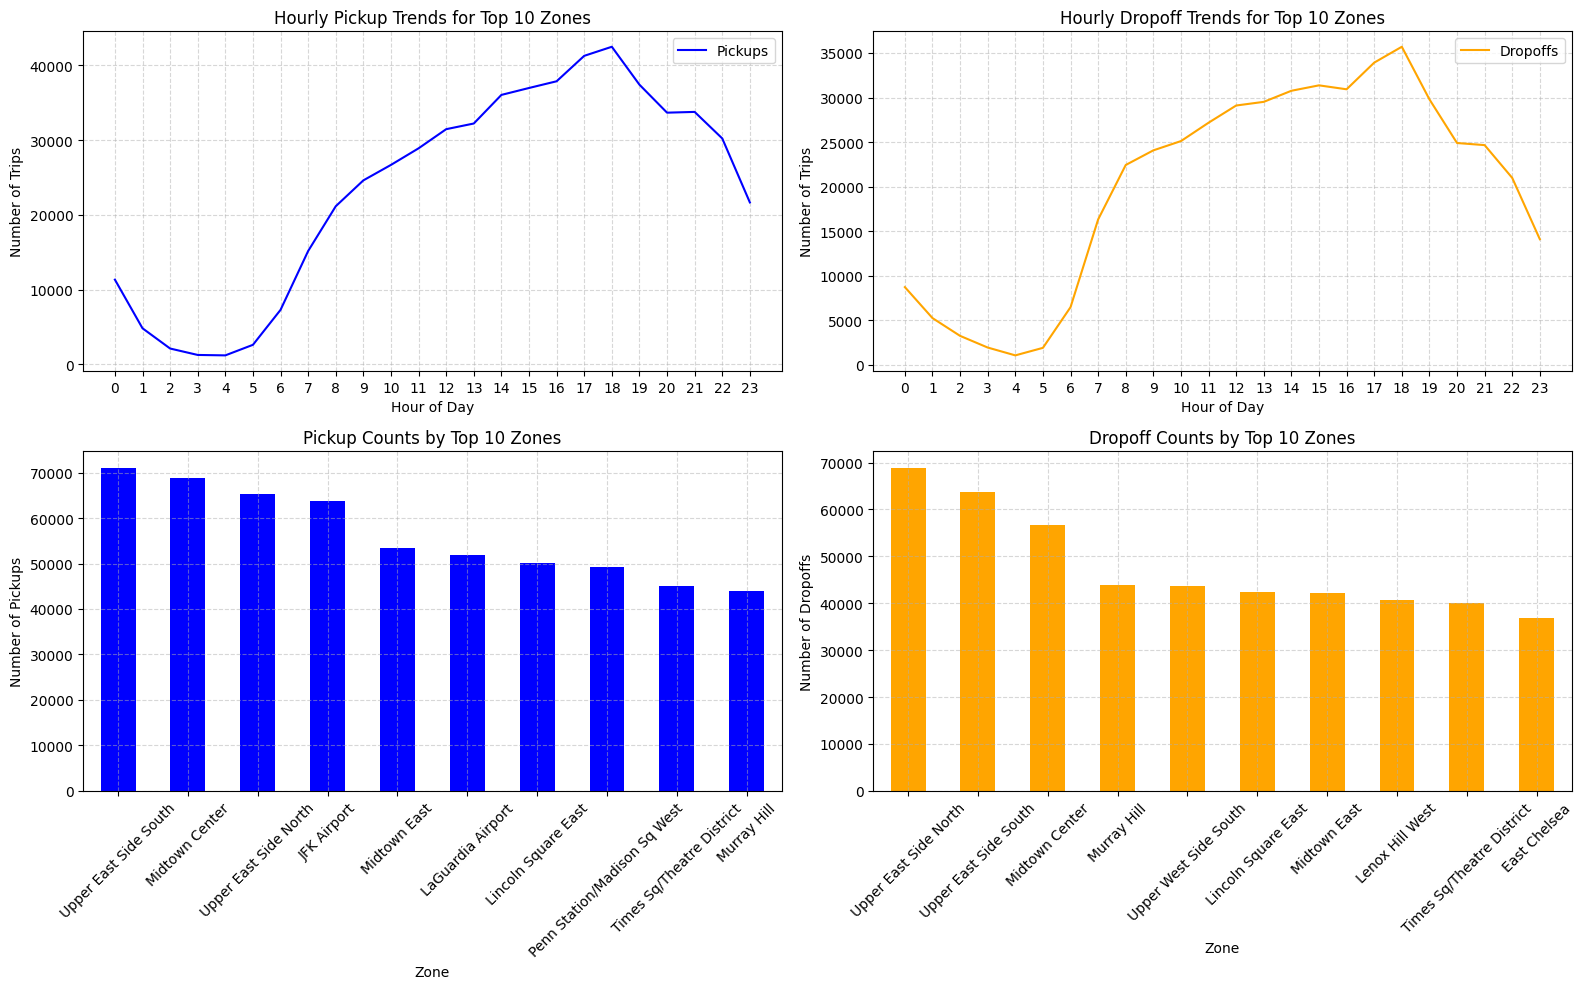

In [53]:
# Find top 10 pickup and dropoff zones

ten_pick_zones=list(merged['pickup_zone'].value_counts().sort_values(ascending=False).index[0:10])
ten_dropoff_zones=list(merged['dropoff_zone'].value_counts().sort_values(ascending=False).index[0:10])
print('top 10 zones with high hourly pick up :',ten_pick_zones)
print('top 10 zones with high hourly drop off :',ten_dropoff_zones)

pickup_trends = merged[merged['pickup_zone'].isin(ten_pick_zones)]
dropoff_trends = merged[merged['dropoff_zone'].isin(ten_dropoff_zones)]
plt.figure(figsize=(16, 12))
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
pickup_by_hour = pickup_trends.groupby('hour')['pickup_zone'].count()
plt.plot(pickup_by_hour.index, pickup_by_hour.values, label='Pickups', color='blue')
plt.xticks(range(0, 24))
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('/content/drive/MyDrive/3251')
plt.subplot(2, 2, 2)
dropoff_by_hour = dropoff_trends.groupby('hour')['dropoff_zone'].count()
plt.plot(dropoff_by_hour.index, dropoff_by_hour.values, label='Dropoffs', color='orange')
plt.xticks(range(0, 24))
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('/content/drive/MyDrive/3252')
plt.subplot(2, 2, 3)
pickup_by_zone = pickup_trends['pickup_zone'].value_counts().loc[ten_pick_zones]
pickup_by_zone.plot.bar(color='blue')
plt.title('Pickup Counts by Top 10 Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/3253')
plt.subplot(2, 2, 4)
dropoff_by_zone = dropoff_trends['dropoff_zone'].value_counts().loc[ten_dropoff_zones]
dropoff_by_zone.plot.bar(color='orange')
plt.title('Dropoff Counts by Top 10 Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/3254')

plt.tight_layout()
print('highest pick up in 5pm-6pm zone and highest dropoff in 5pm-6pm only in these zones ')
print('lowest pick up in 2-4 am and lowest dropoff in  3-5am')
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [54]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_ratio=pd.DataFrame({'pick_up_count':merged['pickup_zone'].value_counts(),'drop_off_count':merged['dropoff_zone'].value_counts()})
zone_ratio['ratio']=zone_ratio['pick_up_count']/zone_ratio['drop_off_count']

print('top 10 highest pickup to dropoff ratio are:\n',zone_ratio['ratio'].sort_values(ascending=False).head(10))
print('bottom 10 lowest( excluding 0 pickupcounts location ) pickup to dropoff ratio are:\n',zone_ratio['ratio'].sort_values(ascending=True).head(10))
zone_ratio.fillna(0,inplace=True)
print('bottom 10 lowest(including 0 pickupcounts location ) pickup to dropoff ratio are:\n',zone_ratio['ratio'].sort_values(ascending=True).head(10))

top 10 highest pickup to dropoff ratio are:
 East Elmhurst                       13.570526
JFK Airport                          4.260570
LaGuardia Airport                    2.584829
Saint Michaels Cemetery/Woodside     1.714286
Penn Station/Madison Sq West         1.638306
Greenwich Village South              1.386917
Central Park                         1.385839
West Village                         1.336300
Midtown East                         1.265522
Garment District                     1.222535
Name: ratio, dtype: float64
bottom 10 lowest( excluding 0 pickupcounts location ) pickup to dropoff ratio are:
 Madison                     0.008197
Newark Airport              0.008675
Cambria Heights             0.009346
Bay Terrace/Fort Totten     0.011494
Bellerose                   0.012658
Midwood                     0.012821
Woodlawn/Wakefield          0.013333
Bedford Park                0.014925
Murray Hill-Queens          0.015504
Williamsbridge/Olinville    0.015625
Name: ratio, 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [55]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df=merged[merged['hour'].isin([23,0,1,2,3,4,5])]
ten_night_pick_zones=list(night_df['pickup_zone'].value_counts().sort_values(ascending=False).index[0:10])
ten_night_dropoff_zones=list(night_df['dropoff_zone'].value_counts().sort_values(ascending=False).index[0:10])
print('top 10 zones with high hourly night pick up :',ten_night_pick_zones)
print('top 10 zones with high hourly night drop off :',ten_night_dropoff_zones)

top 10 zones with high hourly night pick up : ['East Village', 'West Village', 'JFK Airport', 'Lower East Side', 'Clinton East', 'Greenwich Village South', 'Times Sq/Theatre District', 'Penn Station/Madison Sq West', 'Midtown South', 'East Chelsea']
top 10 zones with high hourly night drop off : ['East Village', 'Clinton East', 'Murray Hill', 'Gramercy', 'Lenox Hill West', 'East Chelsea', 'Yorkville West', 'West Village', 'Upper West Side South', 'Upper East Side North']


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 12.05%
Daytime Revenue Share: 87.95%


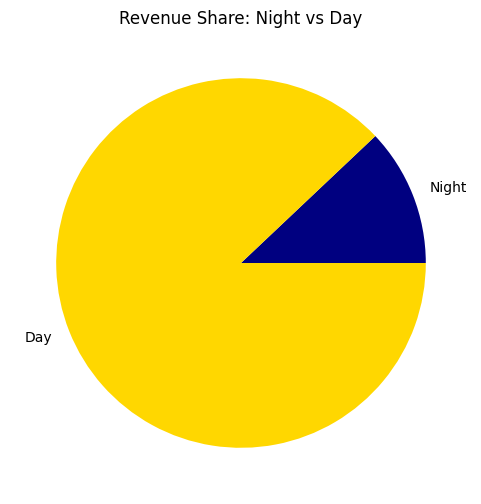

In [56]:
# Filter for night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
night_time_revenue = merged[merged['hour'].isin(night_hours)]['total_amount'].sum()
day_time_revenue = merged[merged['hour'].isin(day_hours)]['total_amount'].sum()
total_revenue = night_time_revenue + day_time_revenue
night_share = (night_time_revenue / total_revenue) * 100
day_share = (day_time_revenue / total_revenue) * 100
print(f'Nighttime Revenue Share: {night_share:.2f}%')
print(f'Daytime Revenue Share: {day_share:.2f}%')


plt.figure(figsize=(6, 6))
plt.pie([night_share, day_share], labels=['Night', 'Day'],colors=['navy', 'gold'])
plt.title('Revenue Share: Night vs Day')
plt.savefig('/content/drive/MyDrive/328')
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

the fare per mile per passenger for different passenger counts is:
 passenger_count
1.0    9.162010
2.0    4.920710
4.0    3.745844
Name: fare_per_mile_per_pessenger, dtype: float64


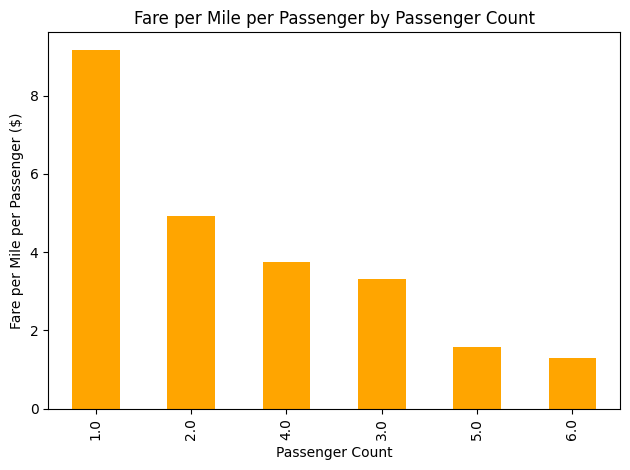

In [57]:
# Analyse the fare per mile per passenger for different passenger counts

merged[['passenger_count','trip_distance','fare_amount']]
merged['fare_per_mile']=merged['fare_amount']/merged['trip_distance']
merged['fare_per_mile_per_pessenger']=merged['fare_amount']/(merged['trip_distance']*merged['passenger_count'])
print('the fare per mile per passenger for different passenger counts is:\n',merged.groupby('passenger_count')['fare_per_mile_per_pessenger'].mean().sort_values(ascending=False).head(3))
plt.figure()
merged.groupby('passenger_count')['fare_per_mile_per_pessenger'].mean().sort_values(ascending=False).plot.bar(color='orange')
plt.title('Fare per Mile per Passenger by Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.xlabel('Passenger Count')
plt.savefig('/content/drive/MyDrive/329')
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

highest avg fare per mile is for hours :  [16, 5, 17]
highest avg fare per mile is for day of week :  ['Sun', 'Thu', 'Tue']


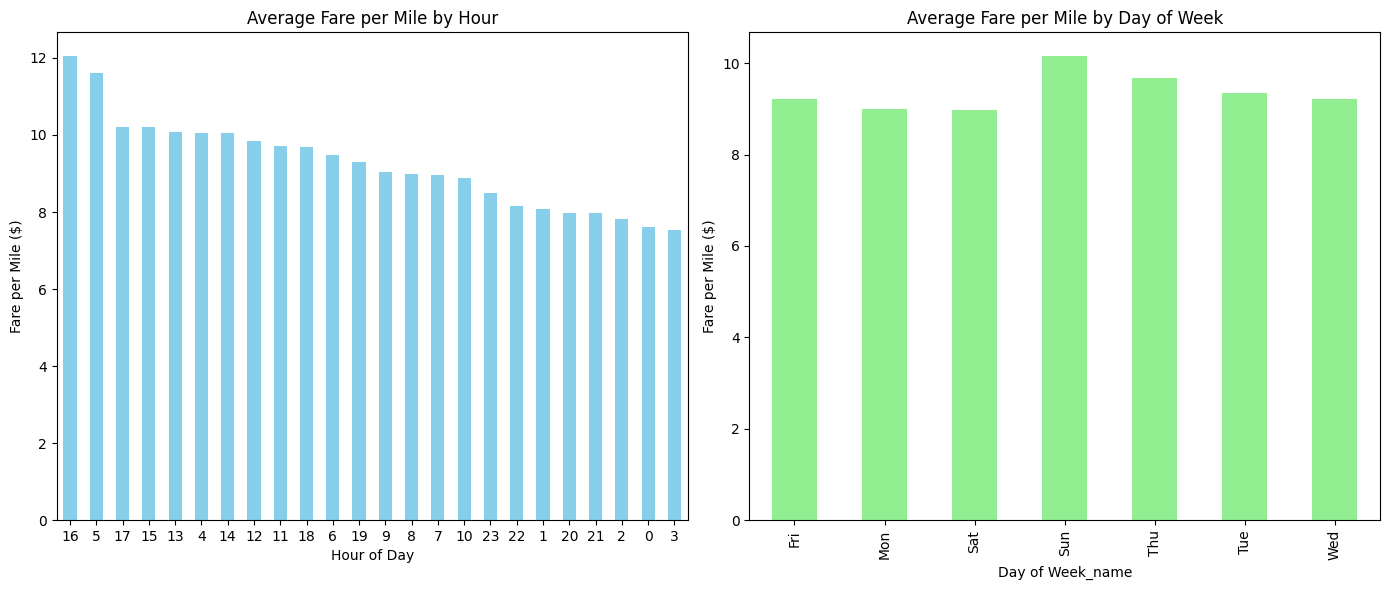

In [58]:
# Compare the average fare per mile for different days and for different times of the day

# Plot
plt.figure(figsize=(14, 6))

# Average fare per mile by hour
plt.subplot(1, 2, 1)
merged.groupby('hour')['fare_per_mile'].mean().sort_values(ascending=False).plot.bar(color='skyblue')
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.savefig('/content/drive/MyDrive/32101')
print('highest avg fare per mile is for hours : ',list(merged.groupby('hour')['fare_per_mile'].mean().sort_values(ascending=False).head(3).index))

# Average fare per mile by day of the week
plt.subplot(1, 2, 2)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_fare_by_day=merged.groupby('day_of_week_name')['fare_per_mile'].mean()
avg_fare_by_day.plot.bar(color='lightgreen')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week_name')
plt.ylabel('Fare per Mile ($)')
plt.savefig('/content/drive/MyDrive/32102')

plt.tight_layout()
print('highest avg fare per mile is for day of week : ',list(avg_fare_by_day.sort_values(ascending=False).head(3).index))
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

vendor 2 having more fare(approx-10) per mile than vendor 1(approx -8) 


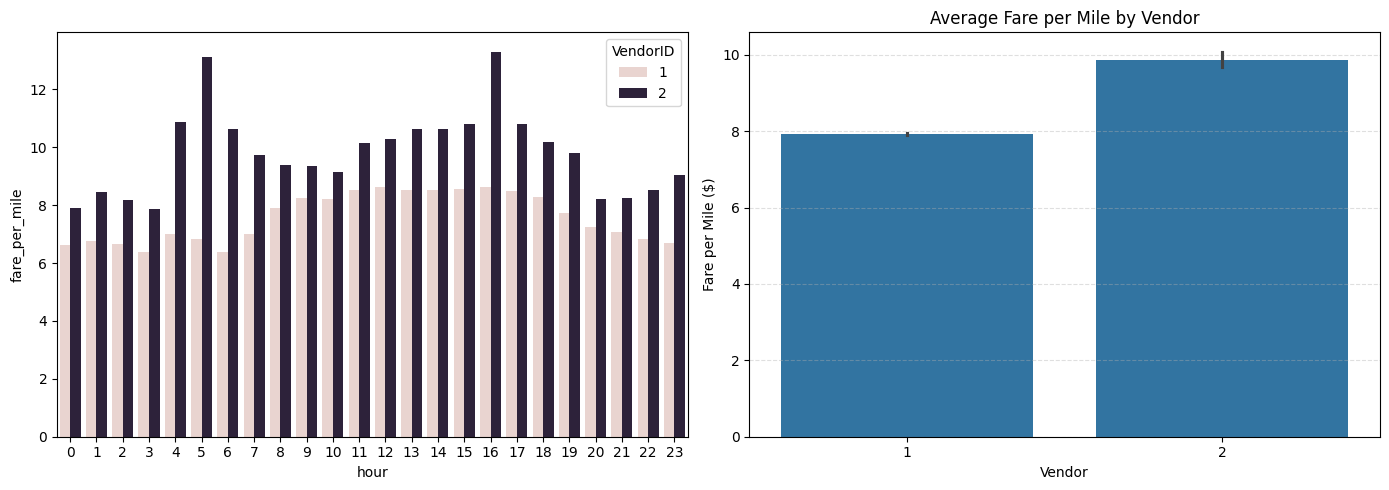

In [59]:
# Compare fare per mile for different vendors

# Plot
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
grouped_vendor_fare=merged.groupby(['hour','VendorID']).fare_per_mile.mean().reset_index()
sns.barplot(data=grouped_vendor_fare,x='hour',y='fare_per_mile',hue='VendorID',estimator='mean')
plt.savefig('/content/drive/MyDrive/32111')
plt.subplot(1,2,2)
sns.barplot(data=merged, x='VendorID', y='fare_per_mile', estimator='mean')

plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Fare per Mile ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
print( 'vendor 2 having more fare(approx-10) per mile than vendor 1(approx -8) ')
plt.savefig('/content/drive/MyDrive/32112')
plt.tight_layout()
plt.show()




**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


for vendor 2 avg fare is higher than vendor 1
for vendor 2 avg fare in 0-2 miles is  higher than vendor one
 for other mile range vendor 2 having more fare but not so much differrence


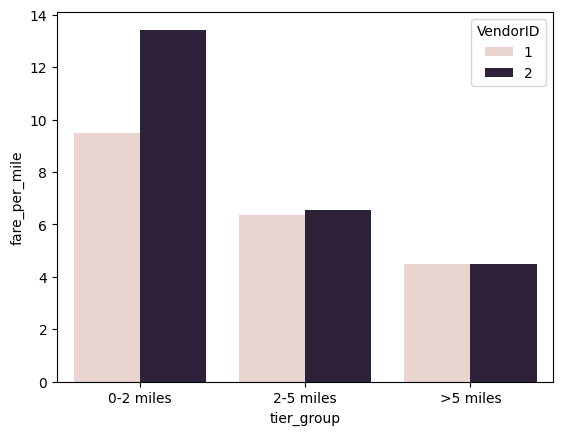

In [60]:
# Defining distance tiers
merged['tier_group']=pd.cut(merged.trip_distance,[0,2,5,9999],labels=['0-2 miles','2-5 miles','>5 miles'])
grouped=merged.groupby(['tier_group','VendorID'],observed=False)['fare_per_mile'].mean().reset_index()
sns.barplot(grouped,x='tier_group',y='fare_per_mile',hue='VendorID')
plt.savefig('/content/drive/MyDrive/3212')
print('for vendor 2 avg fare is higher than vendor 1')
print('for vendor 2 avg fare in 0-2 miles is  higher than vendor one')
print(' for other mile range vendor 2 having more fare but not so much differrence')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

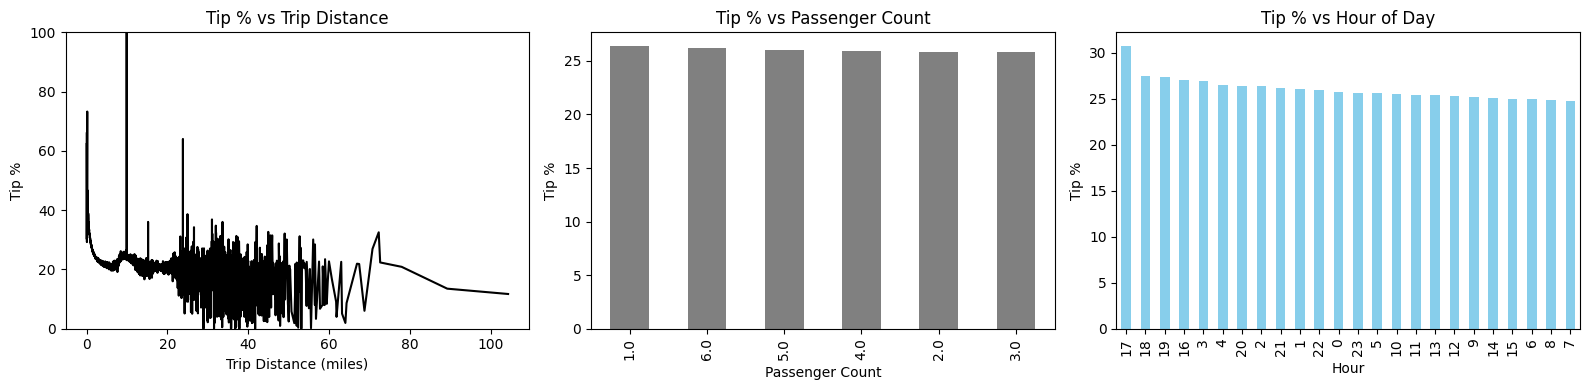

tip percent  for distance more than 50 decreases with distance
 with passenger count no such solid relation was found
for hour of th day tip percent slightly higher at 5pm time which not so significant


In [61]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
plt.figure(figsize=(16,4))
merged['tip_ percentages']=merged['tip_amount']/merged['fare_amount']*100
plt.subplot(1,3,1)
merged.groupby('trip_distance')['tip_ percentages'].mean().plot.line(color='black')
plt.ylim(0,100)
plt.title('Tip % vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip %')
plt.ylim(0, 100)
plt.savefig('/content/drive/MyDrive/32131')
plt.subplot(1,3,2)
merged.groupby('passenger_count')['tip_ percentages'].mean().sort_values(ascending=False).plot.bar(color='grey')#no effect of passenger count
plt.title('Tip % vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.savefig('/content/drive/MyDrive/32132')
plt.subplot(1,3,3)
merged.groupby('hour')['tip_ percentages'].mean().sort_values(ascending=False).plot.bar(color='skyblue')#not much effect of hour
plt.title('Tip % vs Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Tip %')
plt.savefig('/content/drive/MyDrive/32133')
plt.tight_layout()
plt.show()
print('tip percent  for distance more than 50 decreases with distance\n with passenger count no such solid relation was found\nfor hour of th day tip percent slightly higher at 5pm time which not so significant')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low tip percentage highest by payment type: [1, 3]
high tip percentage highest by payment type: [4, 1]
Top 3 hours with highest avg tip % (High Tip Group): [17, 4, 3] 

low range tip percent highest mean tip day of week is:  ['Tue']
high range tip percent highest mean tip day of week is:  ['Mon']


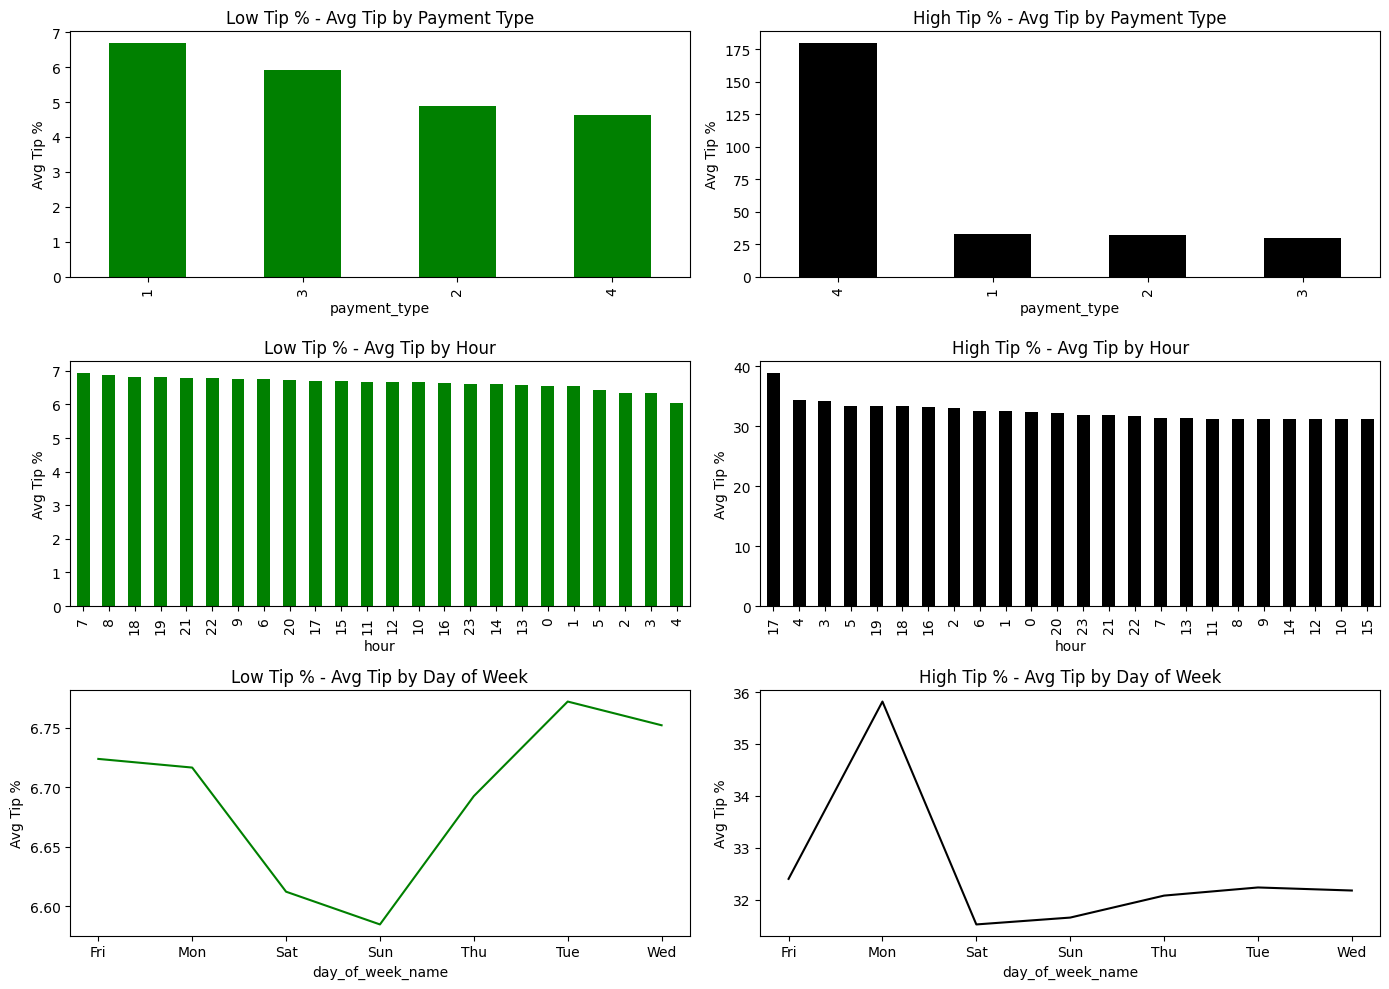

In [62]:
# Filter low and high tip percentage groups
merged_low_tip = merged[merged['tip_ percentages'] < 10]
merged_high_tip = merged[merged['tip_ percentages'] > 25]

plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
merged_low_tip.groupby('payment_type')['tip_ percentages'].mean().sort_values(ascending=False).plot.bar(color='green')
plt.title('Low Tip % - Avg Tip by Payment Type')
plt.ylabel('Avg Tip %')
plt.subplot(3, 2, 2)
merged_high_tip.groupby('payment_type')['tip_ percentages'].mean().sort_values(ascending=False).plot.bar(color='black')
plt.title('High Tip % - Avg Tip by Payment Type')
plt.ylabel('Avg Tip %')
print('Low tip percentage highest by payment type:',list(merged_low_tip.groupby('payment_type')['tip_ percentages'].mean().sort_values(ascending=False).head(2).index))
print('high tip percentage highest by payment type:',list(merged_high_tip.groupby('payment_type')['tip_ percentages'].mean().sort_values(ascending=False).head(2).index))
plt.subplot(3, 2, 3)
merged_low_tip.groupby('hour')['tip_ percentages'].mean().sort_values(ascending=False).plot.bar(color='green')
plt.title('Low Tip % - Avg Tip by Hour')
plt.ylabel('Avg Tip %')
plt.subplot(3, 2, 4)
hourly_high = merged_high_tip.groupby('hour')['tip_ percentages'].mean().sort_values(ascending=False)
hourly_high.plot.bar(color='black')
plt.title('High Tip % - Avg Tip by Hour')
plt.ylabel('Avg Tip %')
print('Top 3 hours with highest avg tip % (High Tip Group):', list(hourly_high.head(3).index), '\n')
plt.subplot(3, 2, 5)
merged_low_tip.groupby('day_of_week_name')['tip_ percentages'].mean().plot.line(color='green')
plt.title('Low Tip % - Avg Tip by Day of Week')
plt.ylabel('Avg Tip %')

plt.subplot(3, 2, 6)
merged_high_tip.groupby('day_of_week_name')['tip_ percentages'].mean().plot.line(color='black')
plt.title('High Tip % - Avg Tip by Day of Week')
plt.ylabel('Avg Tip %')
print('low range tip percent highest mean tip day of week is: ',list(merged_low_tip.groupby('day_of_week_name')['tip_ percentages'].mean().sort_values(ascending=False).head(1).index))
print('high range tip percent highest mean tip day of week is: ',list(merged_high_tip.groupby('day_of_week_name')['tip_ percentages'].mean().sort_values(ascending=False).head(1).index))
plt.tight_layout()
plt.show()




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

top 3 hours with highest mean passenger count: [3, 2, 1]
top 3 days of week  with highest mean passenger count: ['Sat', 'Sun', 'Fri']


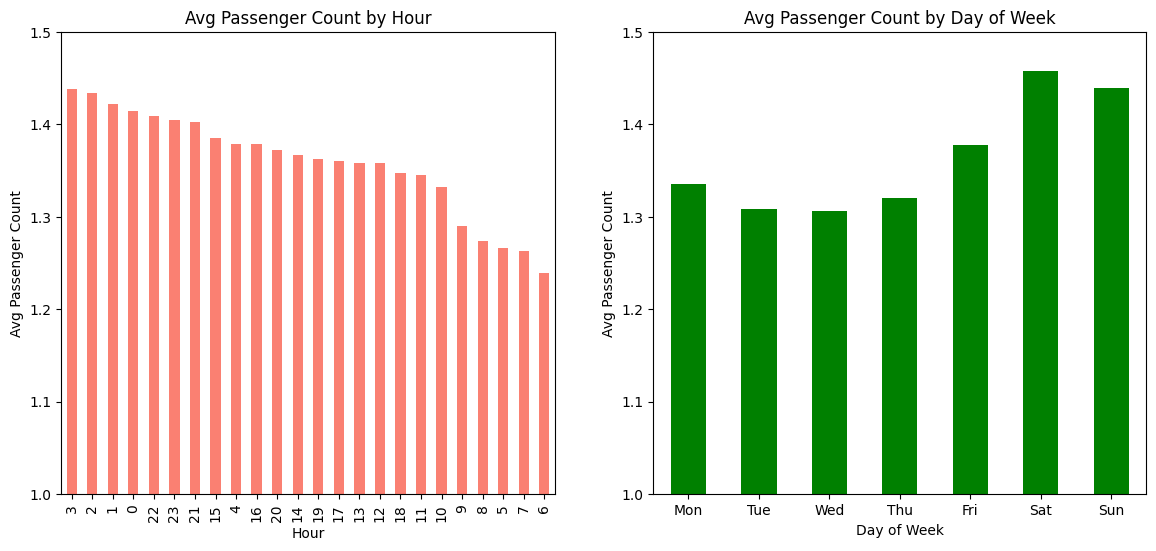

In [63]:
# See how passenger count varies across hours and days
merged['day_name_of_week']=merged['day_of_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
merged.groupby('hour').passenger_count.mean().sort_values(ascending=False).plot.bar(color='salmon')
plt.ylim(1,1.5)
plt.title('Avg Passenger Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Avg Passenger Count')
plt.savefig('/content/drive/MyDrive/32141')
plt.subplot(1,2,2)
print('top 3 hours with highest mean passenger count:',list(merged.groupby('hour').passenger_count.mean().sort_values(ascending=False).head(3).index))

day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

merged.groupby('day_of_week').passenger_count.mean().plot.bar(color='green')
plt.xticks(ticks=range(7), labels=day_labels, rotation=0)
plt.title('Avg Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
print('top 3 days of week  with highest mean passenger count:',list(merged.groupby('day_name_of_week').passenger_count.mean().sort_values(ascending=False).head(3).index))
plt.ylim(1,1.5)
plt.savefig('/content/drive/MyDrive/32142')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 3 zones with highest average passenger count are: ['Arrochar/Fort Wadsworth', 'Ocean Parkway South', 'West Farms/Bronx River']


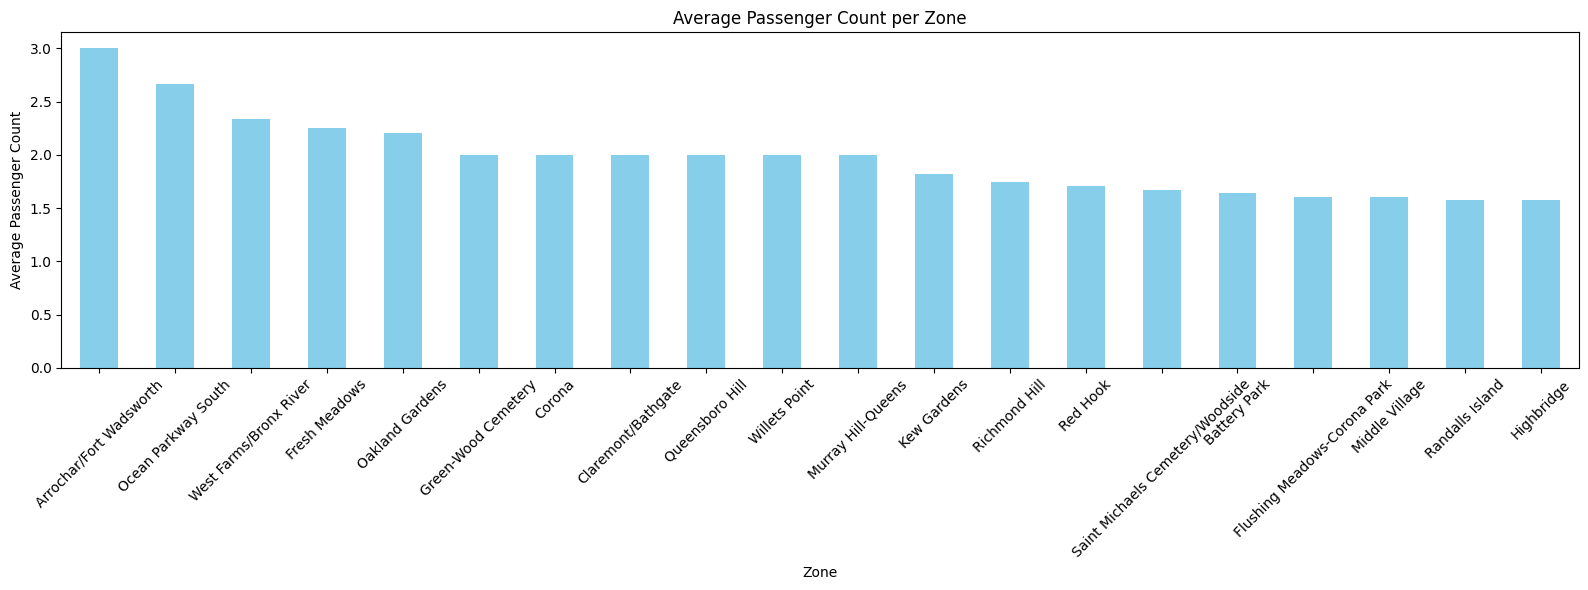

In [64]:
# How does passenger count vary across zones
plt.figure(figsize=(16,6))

avg_passenger = merged.groupby('zone')['passenger_count'].mean().sort_values(ascending=False)

avg_passenger.head(20).plot.bar(color='skyblue')
plt.title('Average Passenger Count per Zone')
plt.ylabel('Average Passenger Count')
plt.xlabel('Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3215')
print('Top 3 zones with highest average passenger count are:', list(avg_passenger.head(3).index))
plt.show()



In [65]:
# Calculate average passenger count per zone
avg_passeng_per_zone = merged.groupby('zone')['passenger_count'].mean().reset_index()
avg_passeng_per_zone = avg_passeng_per_zone.copy()
avg_passeng_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)



# Merge this info into the zones GeoDataFrame
zones = pd.merge(zones, avg_passeng_per_zone, on='zone', how='left')
zones['avg_passenger_count'].fillna(0, inplace=True)  # Fill missing values if any

# Preview the updated GeoDataFrame
zones[['zone', 'avg_passenger_count']].head()

<ipython-input-65-a9963864ea6e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones['avg_passenger_count'].fillna(0, inplace=True)  # Fill missing values if any


zone  avg_passenger_count
0           Newark Airport             1.324324
1              Jamaica Bay             1.000000
2  Allerton/Pelham Gardens             0.000000
3            Alphabet City             1.367769
4            Arden Heights             0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top 3 most frequent hours when extra charge is given: [18, 17, 19]
Top 3 most frequent pickup zones when extra charge is given: ['Upper East Side South', 'Midtown Center', 'Upper East Side North']
Top 3 most frequent dropoff zones when extra charge is given: ['Upper East Side North', 'Upper East Side South', 'Midtown Center']


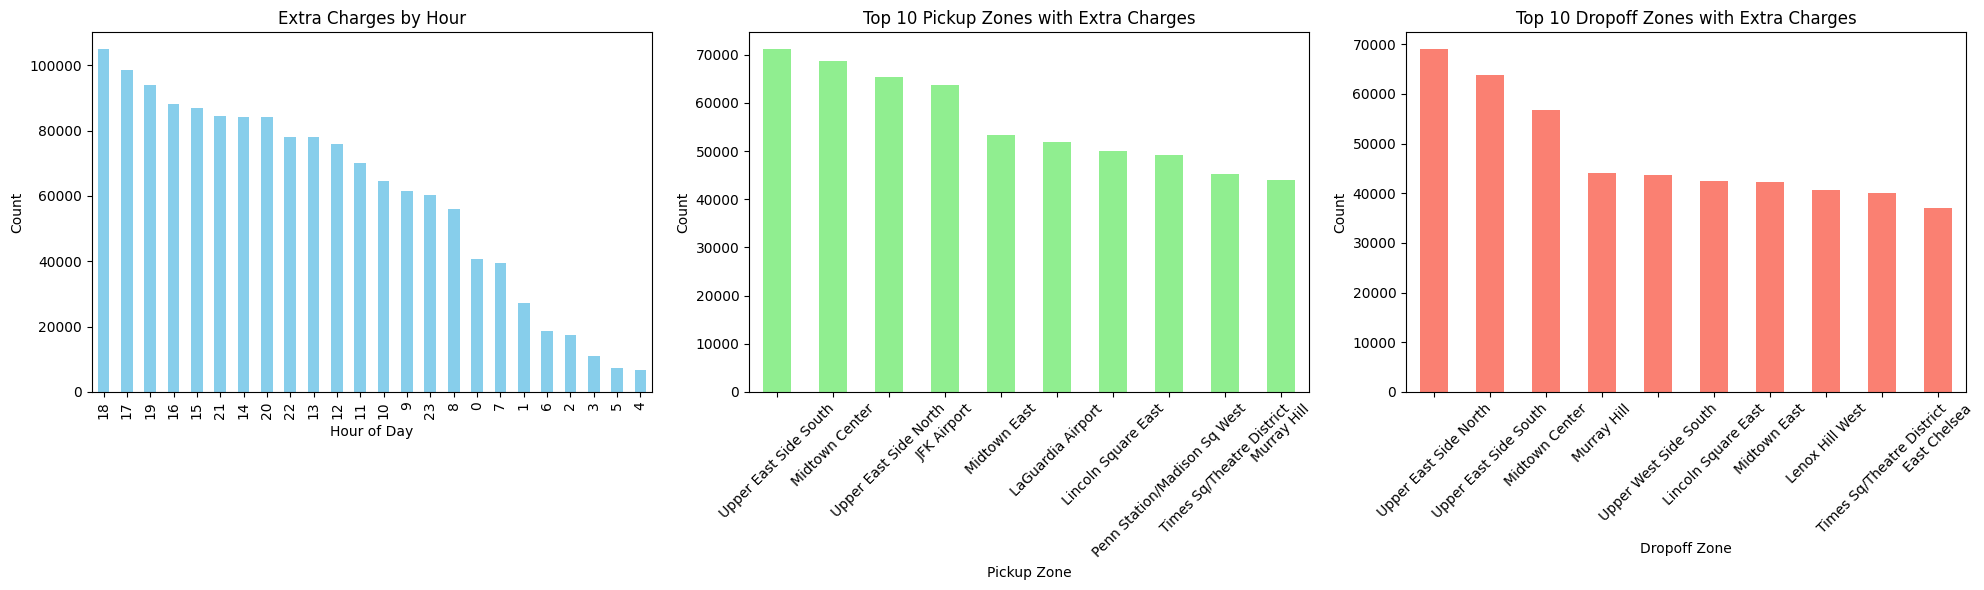

In [66]:
# Hour-wise extra charges
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
merged.groupby('hour')['extra'].count().sort_values(ascending=False).plot.bar(color='skyblue')
plt.title('Extra Charges by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/32161')

# Top 3 hours with most extra charges
top_hours = list(merged.groupby('hour')['extra'].count().sort_values(ascending=False).index[:3])
print(f"Top 3 most frequent hours when extra charge is given: {top_hours}")

# Pickup zone-wise extra charges
plt.subplot(1, 3, 2)
merged.groupby('pickup_zone')['extra'].count().sort_values(ascending=False).head(10).plot.bar(color='lightgreen')
plt.title('Top 10 Pickup Zones with Extra Charges')
plt.xticks(rotation=45)
plt.xlabel('Pickup Zone')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/32162')

# Top 3 pickup zones
top_pick_zones = list(merged.groupby('pickup_zone')['extra'].count().sort_values(ascending=False).index[:3])
print(f"Top 3 most frequent pickup zones when extra charge is given: {top_pick_zones}")

# Dropoff zone-wise extra charges
plt.subplot(1, 3, 3)
merged.groupby('dropoff_zone')['extra'].count().sort_values(ascending=False).head(10).plot.bar(color='salmon')
plt.title('Top 10 Dropoff Zones with Extra Charges')
plt.xticks(rotation=45)
plt.xlabel('Dropoff Zone')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/32163')

# Top 3 dropoff zones
top_drop_zones = list(merged.groupby('dropoff_zone')['extra'].count().sort_values(ascending=False).index[:3])
print(f"Top 3 most frequent dropoff zones when extra charge is given: {top_drop_zones}")

plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [67]:
#please find answer in below text

**My answer** :**Target High-Demand Zones**: Prioritize taxi deployment in top pickup zones such as Upper East Side South, Midtown Center, Upper East Side North, JFK, and LaGuardia—these areas consistently record high trip volumes, especially during 5–6 PM.

**Adjust for Peak Hours**: Allocate more taxis during the busiest hours (4–6 PM, 5 AM), and reduce idle time during low-demand periods (2–4 AM) to improve fleet efficiency.

**Incentivize Night Shifts**: Nighttime operations generate only 12.05% of revenue. Providing driver incentives for night shifts can help balance coverage and capture more off-peak demand.

**Use Dynamic Routing**: Avoid persistently slow routes like Central Park to Baisley Park, Battery Park City to Seaport, and Manhattan Valley to Bloomingdale. Implement live traffic data to reroute in real time and reduce delays.

**Airport Operations**: Enhance coverage around JFK and LaGuardia, which are among the top pickup zones and have high pickup-to-dropoff ratios—indicating strong outbound demand.

**Reduce Deadheading**: Zones like Madison and Newark Airport show very low pickup-to-dropoff ratios. After drop-offs in these areas, taxis should be guided to nearby high-demand zones to reduce unproductive time.

**Trip Type Optimization**: Assign solo rides for shorter distances (higher fare per mile per passenger) and group/shared rides for longer trips to boost cost-efficiency and passenger satisfaction.

**Vendor-Specific Strategies**: Vendor 2 commands higher fares, especially for short trips (0–2 miles). Understanding such pricing differences can help design vendor-specific dispatching or partnership strategies.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [68]:
#please find my answer below

**Deploy Heavily in Evening Hotspots**: Focus cab availability in Upper East Side South, Midtown Center, and JFK between 4 PM and 6 PM—peak pickup hours with highest trip volumes.

**Early Morning Zones**: Ensure cab presence in nightlife and transit-heavy zones (e.g., Midtown, airports) during early hours (1–3 AM), especially on weekends (Fri–Sun), when passenger counts peak due to late-night travel.

**Weekend Surge Zones**: Allocate more cabs to areas like Midtown East and West Village on Saturdays and Sundays to match increased group travel and leisure trips.

**Daytime Zone Prioritization**: Since 87.95% of revenue occurs during daytime, maintain strong daytime coverage in consistently busy zones (e.g., JFK, Midtown, LaGuardia) and monitor for midday spikes.

**Support High Dropoff, Low Pickup Zones**: Stations near Madison, Newark Airport, and Bronx neighborhoods should redirect cabs post-dropoff toward nearby high-demand pickup areas to reduce idle time.

**Account for Monthly Trends**: If applicable, adjust deployments based on monthly traffic patterns (e.g., holiday surges at airports or events in Midtown) using historical demand data.

**Leverage Slow Route Awareness**: Avoid assigning cabs to routes with chronic slow speeds during peak hours. Instead, keep those cabs stationed in high-demand, high-throughput areas.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [69]:
#find my answer below

**Premium Pricing for Short Trips** (0–2 miles): Since Vendor 2 earns notably more per mile in short trips, introduce dynamic pricing for short, high-demand zones (e.g., Midtown, airport vicinity) during peak hours.

**Maintain Competitive Rates on Long Trips**: For 2–5 miles and >5 miles tiers, where fare differences between vendors are minimal, keep fares in line with competitors to retain market share and reduce price sensitivity among passengers.

**Incentivize Shared Rides**: Fare per mile per passenger drops as passenger count increases. Offer ride-sharing discounts to encourage group bookings, improving vehicle utilization without sacrificing total revenue.

**Time-Based Surge Pricing**: Implement modest fare surges during peak hours (5–6 PM, 4–5 AM) and on high-demand days (Sunday, Thursday), capitalizing on willingness to pay more during busy times.

**Nighttime Flat Fare Options**: Given the lower revenue share at night (12.05%), experiment with flat fare deals for common late-night routes to stimulate off-peak usage without overcomplicating pricing.